In [1]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('digit recognizor.csv')
X = data.iloc[:,1:]
Y = data.iloc[:,0]
X.shape

(42000, 784)

### 画累计方差贡献率曲线，确定降维的范围

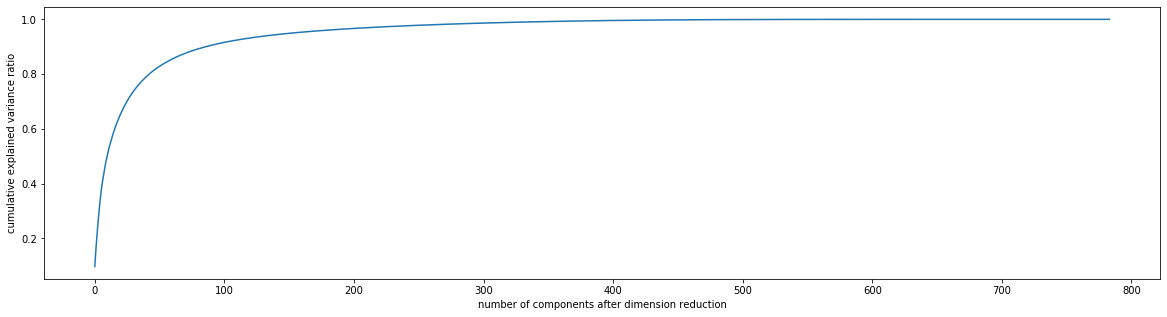

In [3]:
pca_line = PCA().fit(X)
plt.figure(figsize=[20,5])
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.xlabel('number of components after dimension reduction')
plt.ylabel('cumulative explained variance ratio')
plt.show()

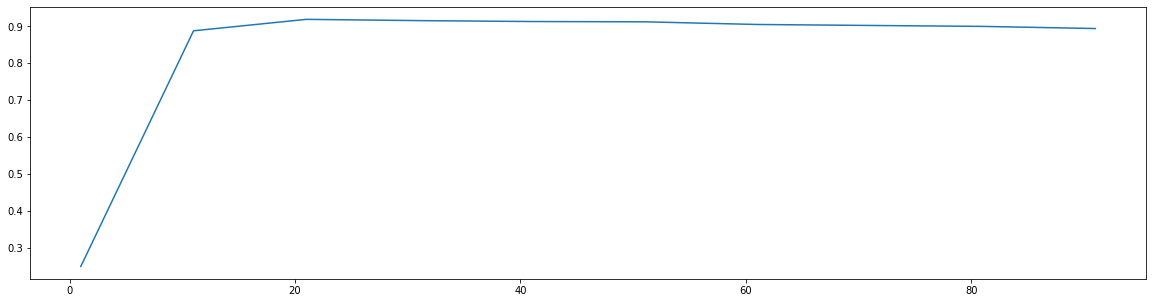

In [4]:
#初步确定0-100
score = []
for i in range(1,101,10):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10,random_state=0),X_dr,Y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,101,10),score)
plt.show()

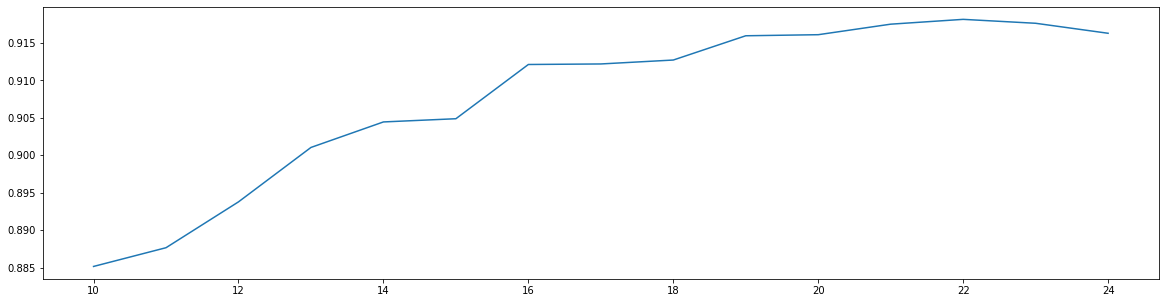

In [5]:
#细化学习曲线
score = []
for i in range(10,25):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10,random_state=0),X_dr,Y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(10,25),score)
plt.show()

In [8]:
X_dr = PCA(21).fit_transform(X)
X_dr.shape

(42000, 21)

In [9]:
cross_val_score(RFC(n_estimators=10,random_state=0),X_dr,Y,cv=5).mean()

0.916452380952381

### 经过降维 特征数量已经不多了 在随机森林到达瓶颈后，换模型怎么样？

In [10]:
from sklearn.neighbors import KNeighborsClassifier as KNN
cross_val_score(KNN(),X_dr,Y,cv=5).mean()

0.9676904761904762

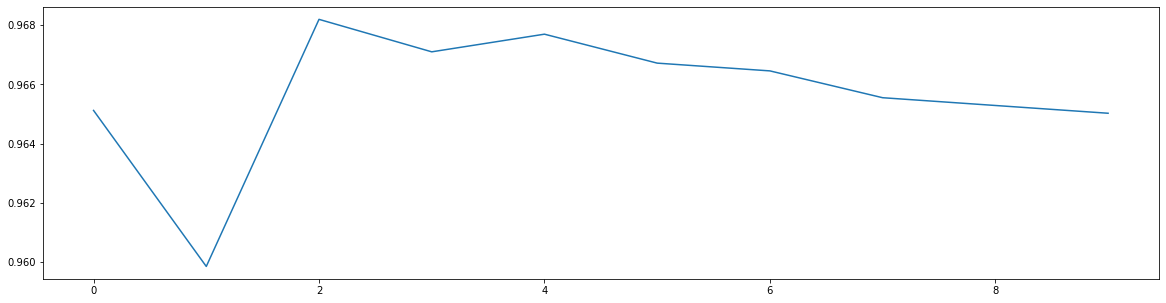

In [11]:
score = []
for i in range(10):
    once = cross_val_score(KNN(i+1),X_dr,Y,cv=5).mean()
    score.append(once)
    
plt.figure(figsize=[20,5])
plt.plot(range(10),score)
plt.show()

In [13]:
cross_val_score(KNN(3),X_dr,Y,cv=5).mean()

0.9681904761904763